In [1]:
import numpy as np
import matplotlib.pyplot as plt

crust * rho_c + mantle * rho_m = reference_pressure

mantle = (reference_pressure - crust * rho_c) / rho_m

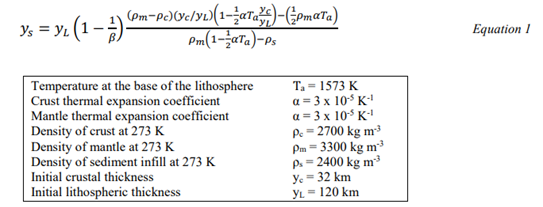

In [ ]:
def get_sediment_thickness(beta,
                           rho_m=3300,
                           rho_c=2700,
                           rho_s=2400,
                           alpha=3e-5,
                           T_a=1573,
                           y_c=32000,
                           y_l=120000):
    upper = (rho_m - rho_c) * (y_c / y_l) * (1 - 1/2 * alpha * T_a * (y_c/y_l)) - (1/2 * rho_m * alpha * T_a)
    lower = rho_m * (1 - 1/2 * alpha * T_a) - rho_s
    ys = y_l * (1 - 1 / beta) * (upper / lower)
    return ys

In [24]:
for i in range(1, 5):
    beta = i
    thickness = get_sediment_thickness(beta=beta)
    print(f"Beta: {beta}, Thickness: {thickness:.2f} m - {thickness * 3.28084:.2f} ft")

Beta: 1, Thickness: 0.00 m - 0.00 ft
Beta: 2, Thickness: 5920.90 m - 19425.52 ft
Beta: 3, Thickness: 7894.53 m - 25900.69 ft
Beta: 4, Thickness: 8881.35 m - 29138.28 ft


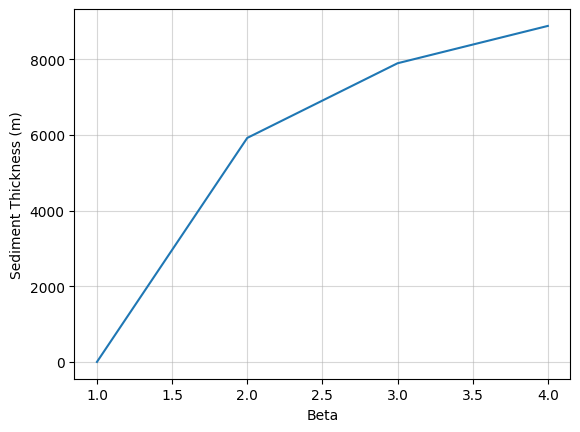

In [26]:
beta = np.linspace(1, 4, num=4)
thickness = get_sediment_thickness(beta=beta)
plt.plot(beta, thickness)
plt.xlabel("Beta")
plt.ylabel("Sediment Thickness (m)")
plt.grid(alpha=0.5)

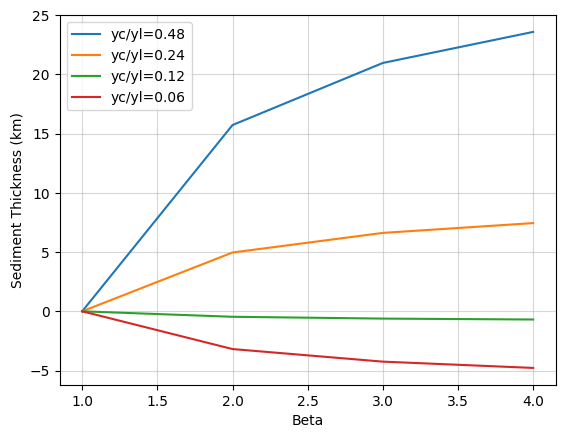

In [36]:
beta = np.linspace(1, 4, num=4)
for y_c in [60000, 30000, 15000, 7500]:
    y_l = 125000
    thickness = get_sediment_thickness(beta=beta, y_c=y_c, y_l=y_l) / 1000  # Convert from meters to kilometers
    plt.plot(beta, thickness, label=f"yc/yl={y_c/y_l:.2f}")
plt.xlabel("Beta")
plt.ylabel("Sediment Thickness (km)")
plt.grid(alpha=0.5)
plt.legend()

[0.   0.01 0.06 0.28 0.73 1.   0.73 0.28 0.06 0.01 0.  ]


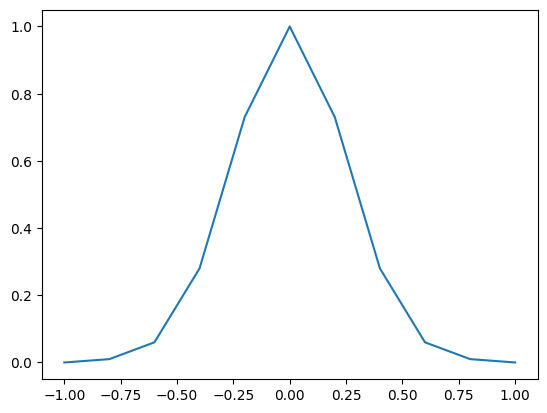

In [49]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.e ** (-x))
gaussian = lambda x, med, std : np.e ** (- (x - med)**2 / (2 * std**2))

n_cells = 10
n_cells = n_cells + 1 - n_cells % 2
x_coords = np.linspace(-1, 1, num=n_cells, dtype=float)
y = gaussian(x_coords, 0 , .25).round(2)
print(y)
plt.plot(x_coords, y)


(52.0, 56.0)

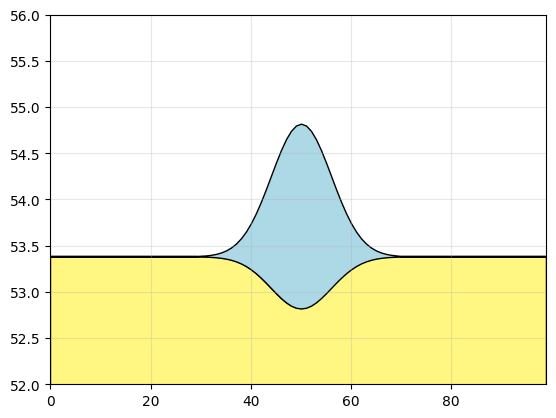

: 

In [ ]:
rho_m = 3250  # kg/m^3
rho_c = 2700 # kg/m^3
rho_ice = 917  # kg/m^3

reference_pressure = 50e3 * rho_m

point = 20

ice = np.zeros(100)
# gaussian thickness
ice[30:70] = 2e3 * np.exp(-0.5 * ((np.arange(40) - 20) / 6) ** 2)

crust = np.full(100, 20e3)

mantle = (reference_pressure - (rho_c * crust) - (rho_ice * ice)) / rho_m

plt.stackplot(np.arange(100), [mantle / 1e3, crust / 1e3, ice / 1e3], labels=['Mantle Thickness (km)', 'Crust Thickness (km)', 'Ice Thickness (km)'], colors=["#3F0D0D", "#FFF782", "#ADD8E6"], edgecolor='black')
plt.xlim(0, 99)
plt.grid(alpha=0.3)
plt.ylim(52, 56)

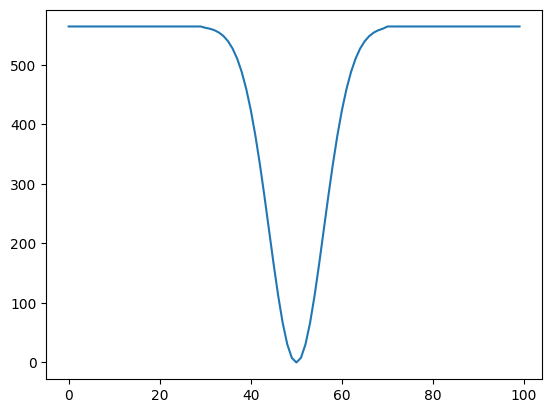

In [69]:
plt.plot((crust + mantle) - (crust + mantle).min())